In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# TASK-1

In [2]:
task1 = pd.read_csv(r"D:\Machine learning projects\Classification\shopping mall prediction\mall_kmeans.csv")

In [3]:
task1.head(3)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6

# Lets make histogram for age distribution

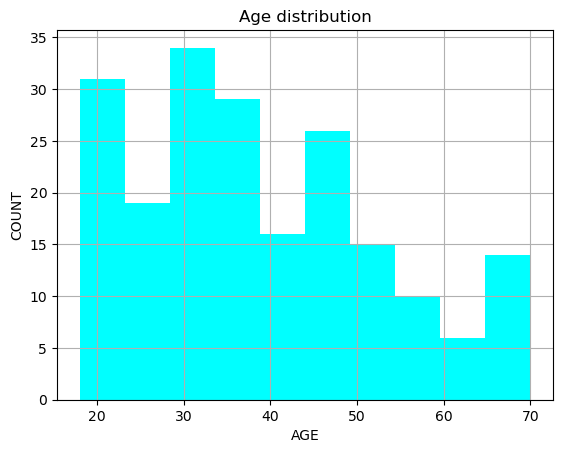

In [4]:
plt.hist(task1.Age, color='cyan')
plt.grid()
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.title("Age distribution");

# Female and male count

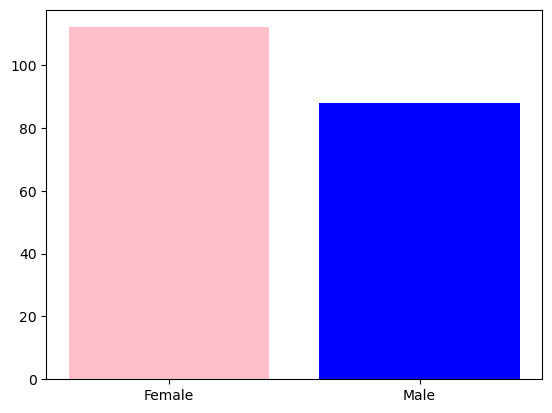

In [5]:
df=pd.DataFrame(task1.Genre.value_counts())
df=df.reset_index()
df
plt.bar(df['index'], df['Genre'], color=['pink', 'blue']);

# TASK- 2

In [6]:
task2 = pd.read_csv(r"D:\Machine learning projects\Classification\titanic_prediction\Titanic.csv")

In [7]:
# checking nulls
task2.isnull().sum()[task2.isnull().sum()>0]

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
# filling the null values
task2.age.fillna(24.0000, inplace = True)
task2.fare.fillna(8.0500, inplace = True)
task2.embarked.fillna('s', inplace = True)

In [9]:
# dropping the unique identifiers
task2 = task2.drop(['name','ticket','cabin','home.dest','body','boat'], axis = 1)

In [10]:
# checkling the object columns
task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


# 67.8% females survived and 32.2 males survived in the titanic boat

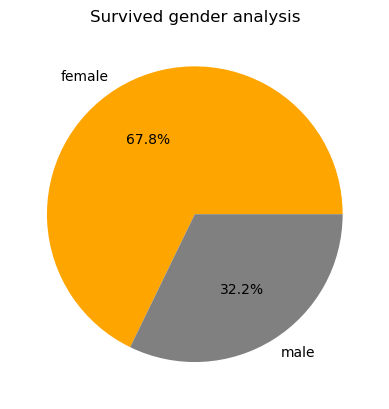

In [11]:
df1 = task2[task2.survived==1]
df1 = pd.DataFrame(df1.groupby('sex')['survived'].sum())
df1 = df1.reset_index()
plt.pie(df1['survived'], labels=df1['sex'], autopct='%1.1f%%', colors=['orange', 'grey'])
plt.title("Survived gender analysis");

# Dead people analysis

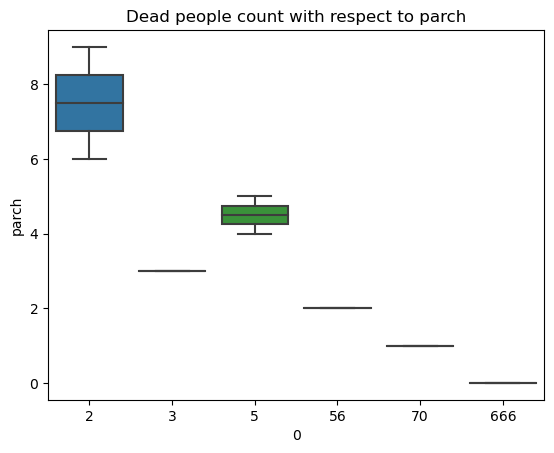

In [12]:
df2 = pd.DataFrame(task2[task2.survived==0])
df2 = pd.crosstab(df2.parch, df2.survived)
df2 = df2.reset_index()
df2.columns = df2.columns.astype(str)
df2
sns.boxplot(x='0',y='parch', data=df2)
plt.title("Dead people count with respect to parch");
# seems people who came along with lots of people have died in more numbers

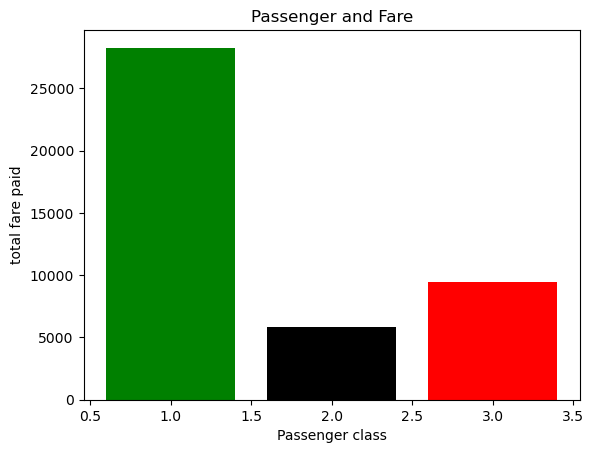

In [13]:
df4 = pd.DataFrame(task2.groupby('pclass')['fare'].sum())
df4 = df4.reset_index()
plt.bar(x = df4['pclass'], height = df4['fare'], color = ['green', 'black','red'])
plt.xlabel("Passenger class")
plt.ylabel("total fare paid")
plt.title("Passenger and Fare");

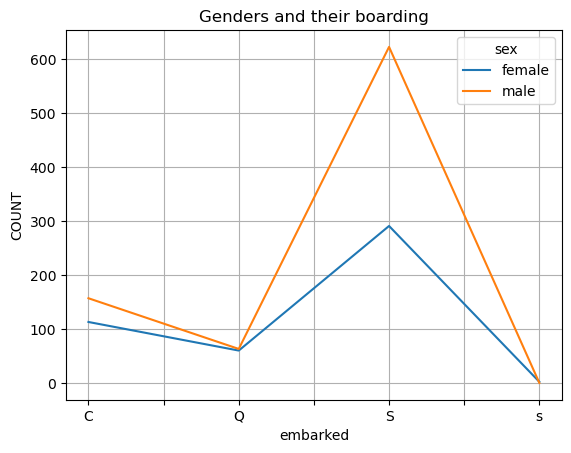

In [14]:
df5 = pd.DataFrame(pd.crosstab(task2.embarked,task2.sex))
df5.plot()
plt.title("Genders and their boarding")
plt.ylabel("COUNT")
plt.grid();

In [15]:
# Replacinge and converting the object columns into numeric values
task2.sex.replace({'female':0, 'male':1}, inplace = True)
task2.embarked.replace({'S':0, 'C':1, 's':2, 'Q':3}, inplace = True)

# Task 3

In [16]:
task3 = pd.read_csv(r"D:\bank-full.csv", delimiter=';')

In [17]:
task3.head(4)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no

In [18]:
task3.shape

(45211, 17)

# Data cleaning

In [19]:
task3.info()
# checking the objects data to convert them into the numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
task3.job.replace({'management':4, 'technician':5, 'entrepreneur':6, 'blue-collar':7,
       'unknown':11, 'retired':9, 'admin.':3, 'services':2, 'self-employed':1,
       'unemployed':10, 'housemaid':8, 'student':0}, inplace = True)
task3.marital.replace({'married':1, 'single':0, 'divorced':2}, inplace = True)
task3.education.replace({'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1}, inplace = True)
task3.contact.replace({'unknown':0, 'cellular':1, 'telephone':2}, inplace = True)
task3.month.replace({'may':4, 'jun':5, 'jul':6, 'aug':7, 'oct':9, 'nov':10, 'dec':11, 'jan':0, 'feb':1,
       'mar':2, 'apr':3, 'sep':8}, inplace = True)
task3.y.replace({'no':0, 'yes':1}, inplace = True)
task3.poutcome.replace({'unknown':0, 'failure':3, 'other':2, 'success':1}, inplace = True)
task3.default = le.fit_transform(task3.default)
task3.housing = le.fit_transform(task3.housing)
task3.loan = le.fit_transform(task3.loan)

# Building model

In [22]:
task3.y.value_counts()
# class imbalance problem

0    39922
1     5289
Name: y, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train, test= train_test_split(task3, test_size=.2)

In [25]:
# lets do oversampling
abc = train[train.y == 1]
train = pd.concat([train, abc, abc, abc, abc, abc, abc])

In [26]:
train.y.value_counts()

0    31934
1    29638
Name: y, dtype: int64

In [27]:
train_x = train.iloc[::, :-1]
train_y = train.iloc[::, -1]

test_x = test.iloc[::, :-1]
test_y = test.iloc[::, -1]

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=100)

In [29]:
dt.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=100)

In [30]:
pred_y_train = dt.predict(train_x)
pred_y_test = dt.predict(test_x)

In [31]:
from sklearn.metrics import *

In [32]:
tab_train = confusion_matrix(train_y, pred_y_train)
tab_train

array([[26739,  5195],
       [ 4466, 25172]], dtype=int64)

In [33]:
tab_test = confusion_matrix(test_y, pred_y_test)
tab_test

array([[6711, 1277],
       [ 191,  864]], dtype=int64)

In [34]:
print(classification_report(test_y, pred_y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7988
           1       0.40      0.82      0.54      1055

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.72      9043
weighted avg       0.91      0.84      0.86      9043



In [35]:
search_dict = {"criterion":['gini', 'entropy'],
              "max_depth": range(5,9),
              "min_samples_split" :[100,200,300]}

In [36]:
from sklearn.model_selection import GridSearchCV

dt_GridSearchCV = GridSearchCV(dt, param_grid=search_dict, scoring='recall')

In [37]:
dt_GridSearchCV.fit(train_x, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              min_samples_split=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 9),
                         'min_samples_split': [100, 200, 300]},
             scoring='recall')

In [38]:
pred_grid_y = dt_GridSearchCV.predict(test_x)

In [39]:
confusion_matrix(test_y, pred_grid_y)

array([[5884, 2104],
       [ 102,  953]], dtype=int64)

In [40]:
print(classification_report(test_y, pred_grid_y))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      7988
           1       0.31      0.90      0.46      1055

    accuracy                           0.76      9043
   macro avg       0.65      0.82      0.65      9043
weighted avg       0.90      0.76      0.80      9043



In [41]:
from six import StringIO
import pydot
from IPython.display import Image  
from sklearn.tree import export_graphviz

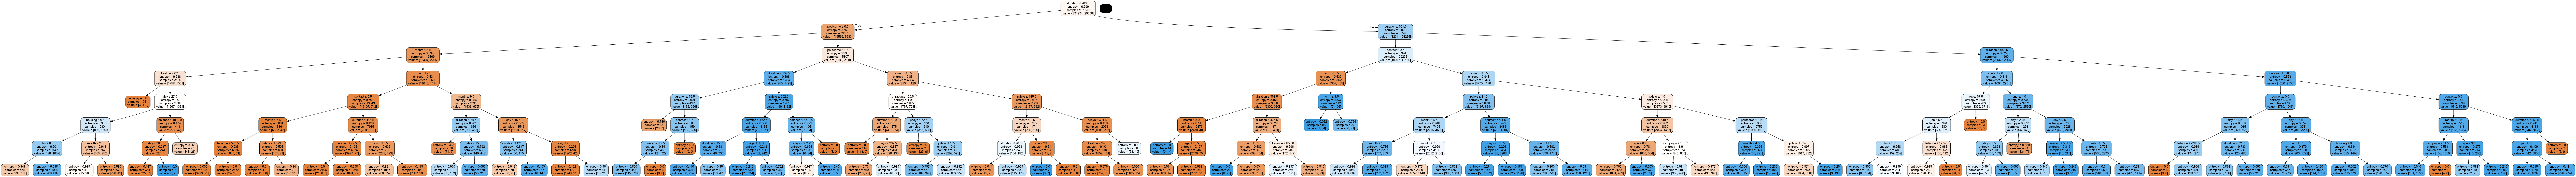

<Figure size 1200x1200 with 0 Axes>

In [42]:
dot_data = StringIO()  ## creating a empty  file 
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=train_x.columns  )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# TASK 4

In [26]:
task4 = pd.read_csv(r"D:\twitter_training.csv")

In [27]:
task4.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [28]:
task4.columns = task4.columns.astype(str)

In [29]:
task4  = task4.rename(columns = {'2401':'id', 'Borderlands':'brand', 'Positive':'sentiments',
       'im getting on borderlands and i will murder you all ,':'views'})

In [30]:
task4.brand.value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [31]:
positive_df = task4[task4.sentiments == 'Positive']

In [32]:
negative_df = task4[task4.sentiments == 'Negative']

In [33]:
irrelevant_df = task4[task4.sentiments == 'Irrelevant']

In [34]:
neutral_df = task4[task4.sentiments == 'Neutral']

In [37]:
fig = px.histogram(positive_df, x='brand', title="Positive sentiments towards brands")
fig.show();
# highest count for positive sentiments is of Assassin Creed and the brand which have least positive comments is Facebook

In [38]:
fig = px.pie(negative_df.brand.value_counts(),names=negative_df.brand.unique(),values=negative_df.brand.value_counts(), title="Negative sentiments towards the brands")
fig.show();
# Borderlands brands got the highest negative comments and Nvidia stands with th least Negative comments

In [39]:
fig = px.line(x=neutral_df['brand'].value_counts().sort_index().index,
              y=neutral_df['brand'].value_counts().sort_index(), markers=True, title="Neutral comments towards brands")

fig.show()
# Amazon has the most count pf neutral sentriments and Fifa has least neutral sentiments

In [40]:
fig = px.scatter(x=irrelevant_df['brand'].value_counts().sort_index().index,
              y=irrelevant_df['brand'].value_counts().sort_index(), title="Irrelevant comments for the brands")
fig.show()
# TomclancyGhost has the least irrelevent sentiments and Batterfield has most irrelevent sentiments

# Sentiment Analysis

In [59]:
task4 = task4.drop(['brand','id'], axis =1)

In [60]:
task4.sentiments.replace({'Positive':2, 'Neutral':1, 'Negative':0, 'Irrelevant':3}, inplace = True)

In [61]:
from nltk.corpus import stopwords
import string

In [62]:
task4

sentiments                                              views
0               2  I am coming to the borders and I will kill you...
1               2  im getting on borderlands and i will kill you ...
2               2  im coming on borderlands and i will murder you...
3               2  im getting on borderlands 2 and i will murder ...
4               2  im getting into borderlands and i can murder y...
...           ...                                                ...
74676           2  Just realized that the Windows partition of my...
74677           2  Just realized that my Mac window partition is ...
74678           2  Just realized the windows partition of my Mac ...
74679           2  Just realized between the windows partition of...
74680           2  Just like the windows partition of my Mac is l...

[74681 rows x 2 columns]

In [63]:
task4.views = task4.views.str.lower()

In [64]:
task4

sentiments                                              views
0               2  i am coming to the borders and i will kill you...
1               2  im getting on borderlands and i will kill you ...
2               2  im coming on borderlands and i will murder you...
3               2  im getting on borderlands 2 and i will murder ...
4               2  im getting into borderlands and i can murder y...
...           ...                                                ...
74676           2  just realized that the windows partition of my...
74677           2  just realized that my mac window partition is ...
74678           2  just realized the windows partition of my mac ...
74679           2  just realized between the windows partition of...
74680           2  just like the windows partition of my mac is l...

[74681 rows x 2 columns]

In [65]:
abcd = stopwords.words('english')
for i in range(0,10):
    abcd.append(str(i))

In [66]:
task4.views = task4.views.astype(str)

In [67]:
def text_process(mess):
    nopunc = [char for char in mess if str(char) not in string.punctuation]
    nopunc = "".join(nopunc)
    return[word for word in nopunc.split() if word not in abcd]

In [68]:
task4.views

0        i am coming to the borders and i will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    just realized that the windows partition of my...
74677    just realized that my mac window partition is ...
74678    just realized the windows partition of my mac ...
74679    just realized between the windows partition of...
74680    just like the windows partition of my mac is l...
Name: views, Length: 74681, dtype: object

In [69]:
# task4['views'] = task4['views'].apply(text_process)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(task4['views'])

In [72]:
len(bow_transformer.vocabulary_)

42275

In [73]:
tdm = bow_transformer.transform(task4['views'])

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
tfidf = TfidfVectorizer()

In [151]:
tfidf_metrics = tfidf.fit_transform(task4['views'])

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# Test data imported

In [112]:
test_twitter = pd.read_csv(r"D:\twitter_validation.csv")

In [113]:
test_twitter.columns = test_twitter.columns.astype(str)

In [114]:
test_twitter  = test_twitter.rename(columns = {'3364':'id', 'Facebook':'brand', 'Irrelevant':'sentiments',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣':'views'})

In [115]:
test_twitter = test_twitter.drop(['brand','id'], axis =1)

In [116]:
test_twitter.sentiments.replace({'Positive':2, 'Neutral':1, 'Negative':0, 'Irrelevant':3}, inplace = True)

In [117]:
test_twitter.views = test_twitter.views.astype(str)

In [118]:
bow_transformer_test = CountVectorizer(analyzer=text_process).fit(test_twitter['views'])

In [119]:
len(bow_transformer_test.vocabulary_)

6482

In [120]:
tdm_test = bow_transformer.transform(test_twitter['views'])
# taking bow transformer training one not testing one

In [152]:
tfidf_test = tfidf.transform(test_twitter['views'])

In [122]:
test_twitter.views = test_twitter['views'].str.lower()

# COUNT VECTORIZER

In [131]:
from sklearn.tree import DecisionTreeClassifier
dt_twitter = DecisionTreeClassifier()

In [136]:
dt_twitter.fit(tdm, task4.sentiments)

DecisionTreeClassifier()

In [137]:
pred_test = dt_twitter.predict(tdm_test)

In [138]:
confusion_matrix(test_twitter.sentiments, pred_test)

array([[179,  19,  49,  19],
       [ 35, 144,  68,  38],
       [ 22,  18, 217,  20],
       [ 18,  16,  34, 103]], dtype=int64)

In [140]:
print(classification_report(test_twitter.sentiments, pred_test))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       266
           1       0.73      0.51      0.60       285
           2       0.59      0.78      0.67       277
           3       0.57      0.60      0.59       171

    accuracy                           0.64       999
   macro avg       0.65      0.64      0.64       999
weighted avg       0.66      0.64      0.64       999



# TF - IDF

In [141]:
dt_tfidf = DecisionTreeClassifier()

In [153]:
dt_tfidf.fit(tfidf_metrics, task4.sentiments)

DecisionTreeClassifier()

In [154]:
tfidf_pred = dt_tfidf.predict(tfidf_test)

In [156]:
confusion_matrix(test_twitter.sentiments, tfidf_pred)

array([[254,   8,   2,   2],
       [ 17, 245,  16,   7],
       [  7,   9, 253,   8],
       [  8,   8,  12, 143]], dtype=int64)

In [157]:
print(classification_report(test_twitter.sentiments, tfidf_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       266
           1       0.91      0.86      0.88       285
           2       0.89      0.91      0.90       277
           3       0.89      0.84      0.86       171

    accuracy                           0.90       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.90      0.90      0.90       999



# Task 5

In [163]:
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Task 5

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 200
import seaborn as sns

In [7]:
df = pd.read_csv(r"US_Accidents1.csv")

In [9]:
display(df.head())
print("-"*125)
print(f"shape of the dataframe is {df.shape}")
print("-"*125)
display(df.info())

Unnamed: 0         ID  Severity           Start_Time          End_Time  \
0           0  A-2716644         4  2016-09-02 18:20:00  10-02-2016 00:20   
1           1  A-2716645         4  2016-09-02 18:20:00  10-02-2016 00:20   
2           2  A-2716649         4  2016-10-02 06:18:00  10-02-2016 12:18   
3           3  A-2716652         2  2016-10-02 08:35:00  10-02-2016 14:35   
4           4  A-2716669         2  2016-10-02 12:54:00  10-02-2016 18:54   

   Start_Lat  Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0   40.45112  -85.15048  40.35429 -85.14993         6.690   
1   40.35429  -85.14993  40.45112 -85.15048         6.690   
2   40.72813  -84.78965  40.74559 -84.78962         1.206   
3   41.83193  -80.10143  41.84149 -80.11099         0.824   
4   41.48339  -81.66297  41.47692 -81.66075         0.462   

                                         Description   Number  \
0  Closed between IN-26 and IN-67 - Road closed d...   9001.0   
1  Closed between IN-67 and IN-26 - Road closed d...    473.0   
2  Closed between Willshire and US-33/Rockford Rd...  12998.0   
3       Between Irish Rd and Blystone Rd - Accident.  25529.0   
4                      At I-490/Exit 161 - Accident.   3937.0   

             Street Side               City    County State     Zipcode  \
0   W State Road 26    R            Dunkirk       Jay    IN       47336   
1     N Meridian St    R             Redkey       Jay    IN  47373-9430   
2    State Route 49    R          Willshire  Van Wert    OH  45898-9523   
3        Highway 99    L  Cambridge Springs  Crawford    PA       16403   
4           Iron Ct    L          Cleveland  Cuyahoga    OH       44115   

  Country    Timezone Airport_Code Weather_Timestamp  Temperature(F)  \
0      US  US/Eastern         KMIE  09-02-2016 18:20            19.9   
1      US  US/Eastern         KMIE  09-02-2016 18:20            19.9   
2      US  US/Eastern         KFWA  10-02-2016 05:54            17.1   
3      US  US/Eastern         KGKJ  10-02-2016 08:34            21.0   
4      US  US/Eastern         KBKL  10-02-2016 12:53            24.1   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0            7.3         81.0         29.85             2.0            WNW   
1            7.3         81.0         29.85             2.0            WNW   
2            0.6         77.0         29.91             2.5           West   
3            9.9         85.0         29.69             1.0            WSW   
4            7.1         75.0         29.82             2.0           West   

   Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  \
0             12.7               0.00        Light Snow    False  False   
1             12.7               0.00        Light Snow    False  False   
2             19.6               0.01        Light Snow    False  False   
3             10.4               0.00        Light Snow    False  False   
4             28.8               0.00        Light Snow    False  False   

   Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False     False    False    False       False    False  False   
1     False     False     False    False    False       False    False  False   
2     False     False     False    False    False       False    False  False   
3     False     False     False    False    False       False    False  False   
4     False     False     False    False    False       False    False  False   

   Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset  \
0            False           False         False          Night   
1            False           False         False          Night   
2            False           False         False          Night   
3            False           False         False            Day   
4            False           False         False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0            Day             

-----------------------------------------------------------------------------------------------------------------------------
shape of the dataframe is (278693, 48)
-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278693 entries, 0 to 278692
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             278693 non-null  int64  
 1   ID                     278693 non-null  object 
 2   Severity               278693 non-null  int64  
 3   Start_Time             278693 non-null  object 
 4   End_Time               278693 non-null  object 
 5   Start_Lat              278693 non-null  float64
 6   Start_Lng              278693 non-null  float64
 7   End_Lat                278693 non-null  float64
 8   End_Lng                278693 non-null  float64
 9   Distance(m

None

In [10]:
df.Street.nunique()

45931

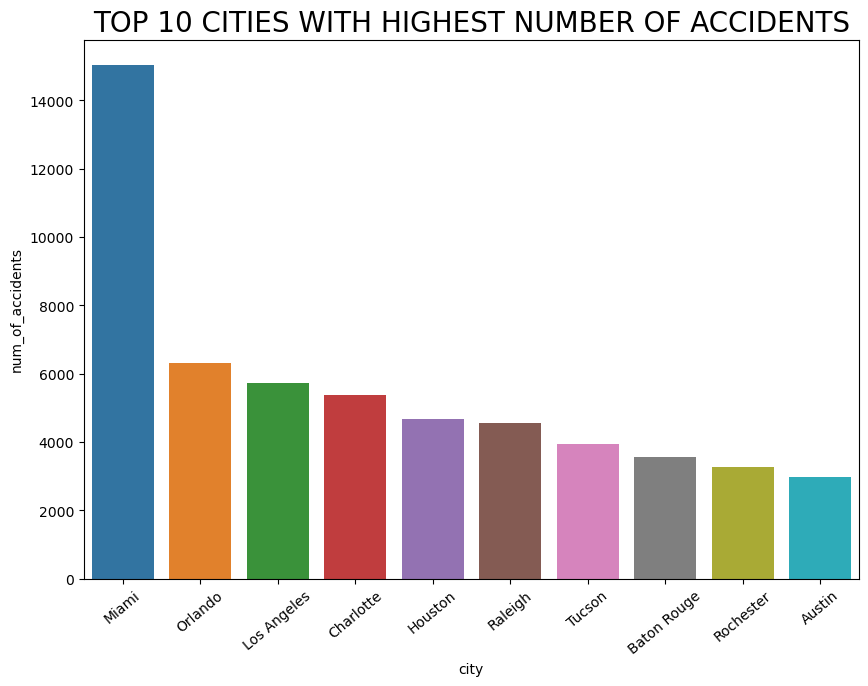

In [13]:
top10_cities_df=df["City"].value_counts().sort_values(ascending = False)[0:10].reset_index()
top10_cities_df.columns=["city","num_of_accidents"]
plt.figure(figsize=(10,7))
sns.barplot(x="city",y="num_of_accidents",data=top10_cities_df)
plt.title("TOP 10 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)
plt.show()

In [14]:
top10_cities_df2 = pd.DataFrame()
for city in top10_cities_df.city:
    top10_cities_df2 = pd.concat([top10_cities_df2,df[df.City == city]])
city_sev_df = top10_cities_df2.groupby(['City','Severity']).ID.count().reset_index()

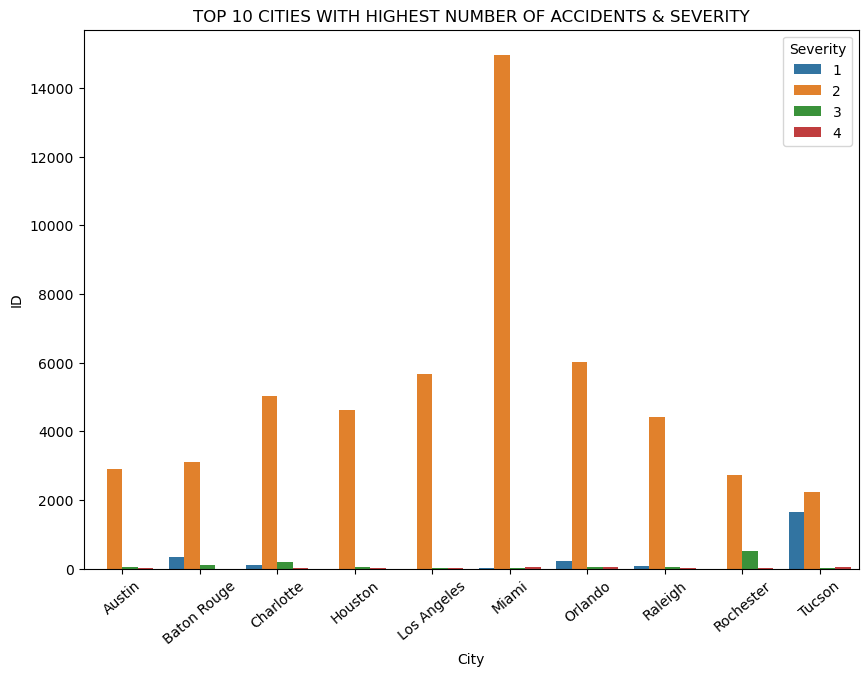

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(data =city_sev_df, x = 'City', y = 'ID', hue = 'Severity')
plt.title("TOP 10 CITIES WITH HIGHEST NUMBER OF ACCIDENTS & SEVERITY")
plt.xticks(rotation=40);

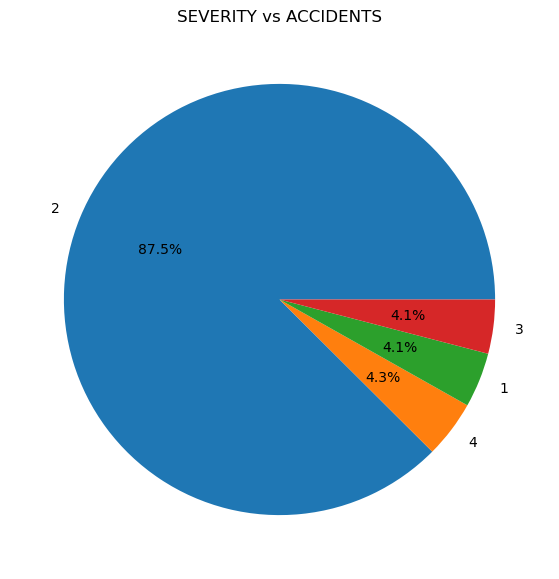

In [16]:
top10_cities_df=df["Severity"].value_counts().sort_values(ascending = False).reset_index()
top10_cities_df.columns=["Severity","num_of_accidents"]
plt.figure(figsize=(10,7))
plt.pie(labels="Severity",x="num_of_accidents",data=top10_cities_df, autopct = "%1.1f%%")
plt.title("SEVERITY vs ACCIDENTS");

In [17]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [18]:
df["month"] = df.Start_Time.dt.month_name()

In [19]:
df["year"] = df.Start_Time.dt.year

In [20]:
monthly_accidents=df[["month","year"]].value_counts().reset_index()
monthly_accidents.columns=["month","year","number_of_accidents"]

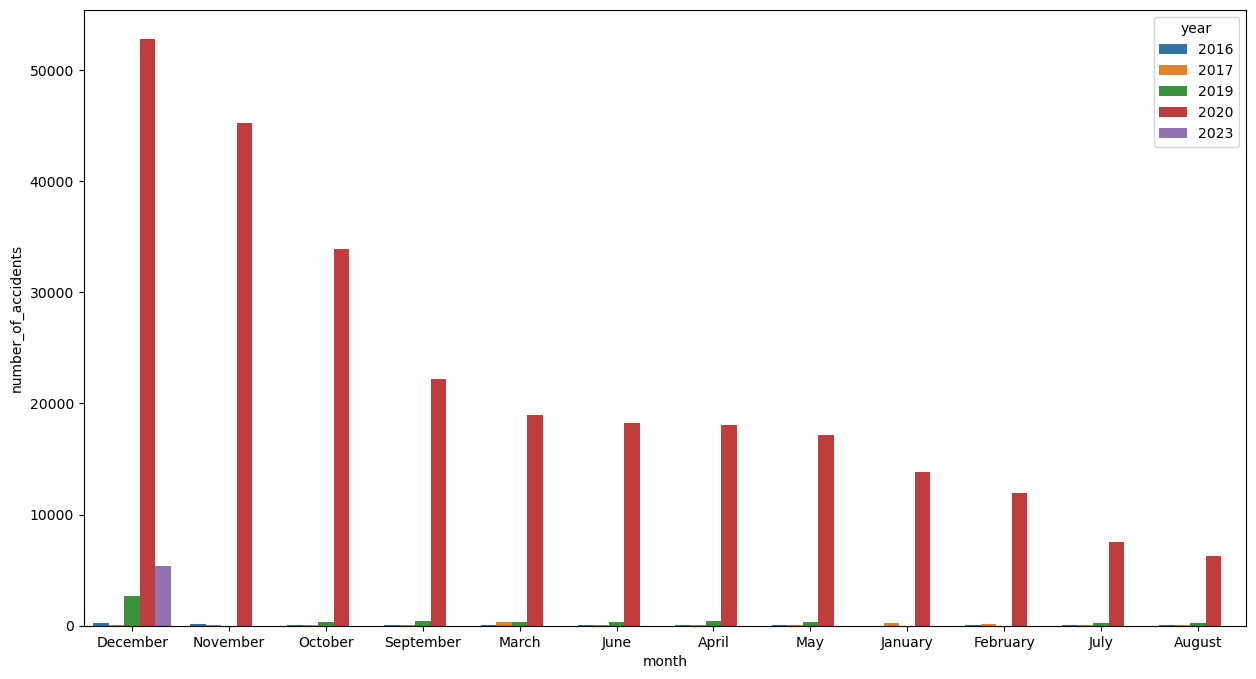

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x="month",y="number_of_accidents",hue="year",data=monthly_accidents);

In [22]:
df['hour'] = df.Start_Time.dt.hour

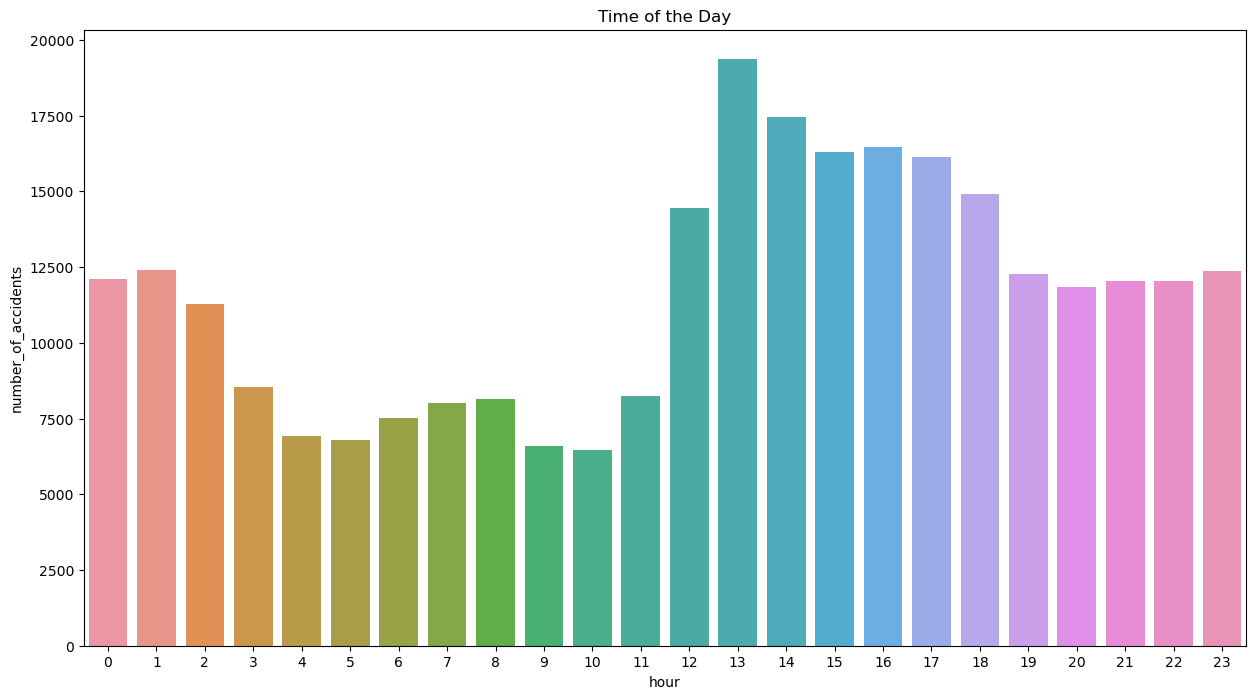

In [23]:
Hourly_accidents=df[["hour"]].value_counts().reset_index()
Hourly_accidents.columns=["hour","number_of_accidents"]
plt.figure(figsize=(15,8))
sns.barplot(x="hour",y="number_of_accidents",data=Hourly_accidents)
plt.title("Time of the Day");

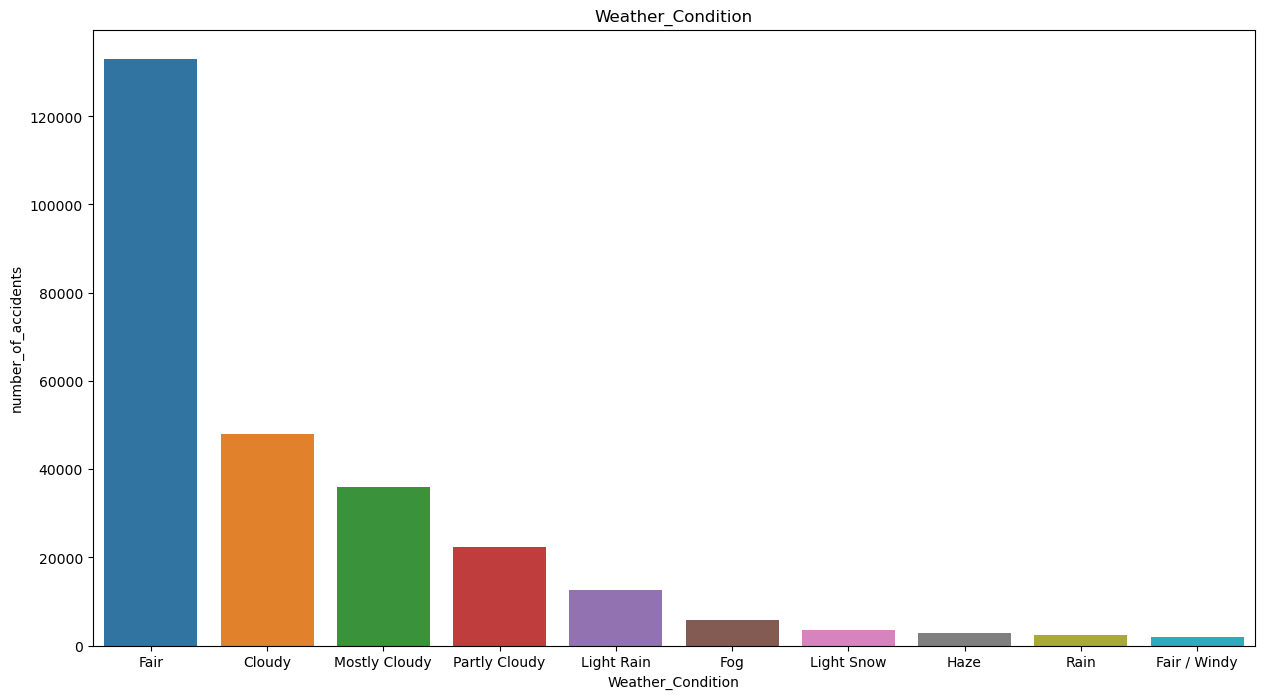

In [24]:
df['Weather_Condition'].value_counts()[:10]

Weather_Condition_df=df[["Weather_Condition"]].value_counts()[:10].reset_index()
Weather_Condition_df.columns=["Weather_Condition","number_of_accidents"]
plt.figure(figsize=(15,8))
sns.barplot(x="Weather_Condition",y="number_of_accidents",data=Weather_Condition_df)
plt.title("Weather_Condition");

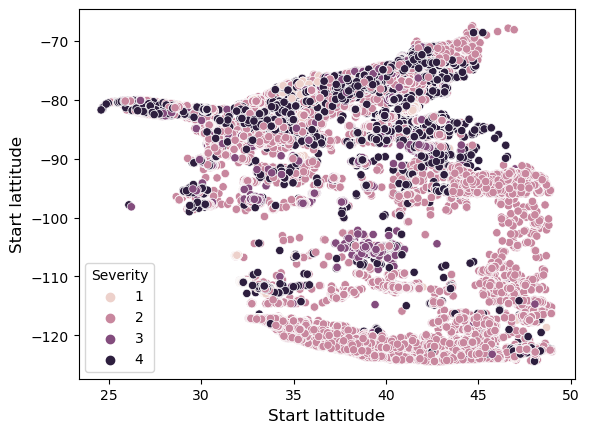

In [25]:
sns.scatterplot(x=df.Start_Lat, y=df.Start_Lng, hue=df.Severity)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()